# Boston House Price Prediction

## Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

### Which noteworthy trends of features and relations between features as well as features and regression target do you see?

* CRIM:
    * per capita crime rate by town
* ZN:
    * proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS:
    * proportion of non-retail business acres per town
* CHAS:
    * Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX:
    * nitric oxides concentration (parts per 10 million)
* RM:
    * average number of rooms per dwelling
* AGE:
    * proportion of owner-occupied units built prior to 1940
* DIS:
    * weighted distances to five Boston employment centres
* RAD:
    * index of accessibility to radial highways
* TAX:
    * full-value property-tax rate per 10,000
* PTRATIO:
    * pupil-teacher ratio by town
* B:
    * 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT:
    * % lower status of the population
* MEDV (TAGET):
    * Median value of owner-occupied homes in $1000's

In [133]:
import pandas as pd

df = pd.read_csv("housing.csv", sep="\s+",
                 names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"],
                 header=None)

df.describe() # list some statistics for the features in the dataset

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


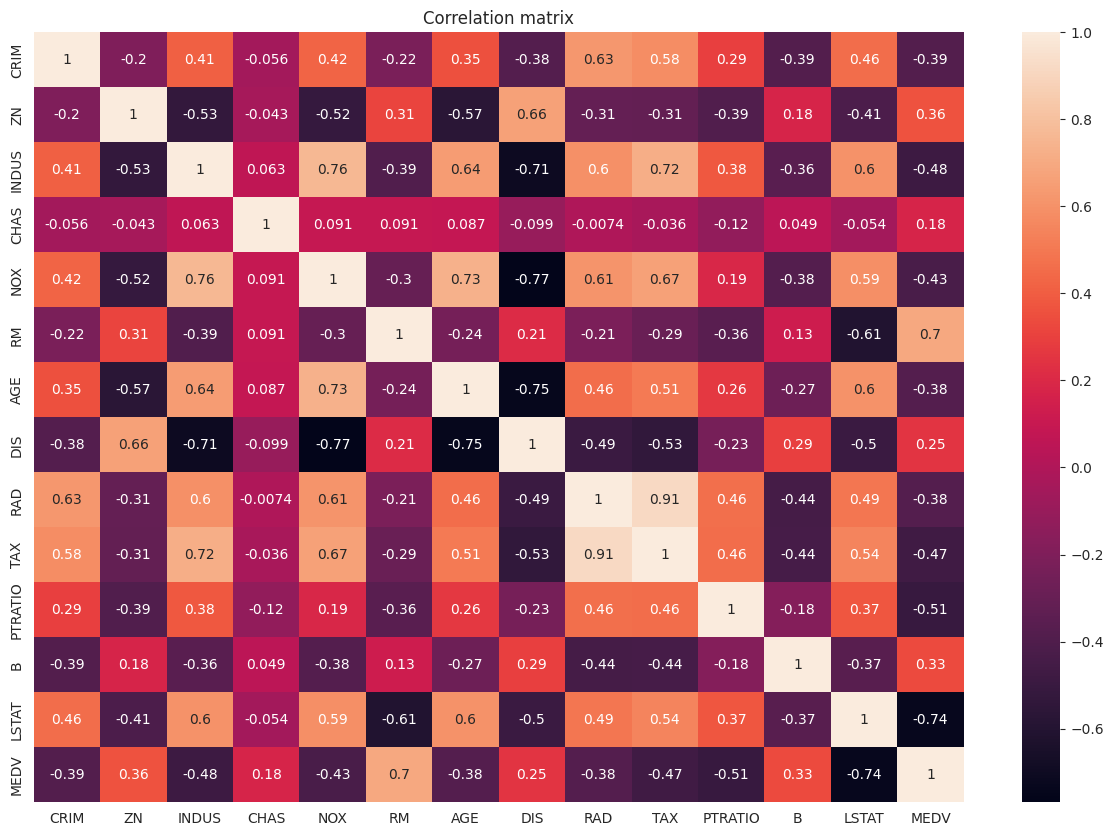

In [106]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

It makes sense, that the `MEDV` correlates negatively with the `CRIM`, since demand for houses in areas with high crime rate would be lower than in those with lower rates.
It also makes sense, that the prices in low crime rate areas fluctuate more than in those with higher crime rate, since this relation does not factor in other factors such as location.

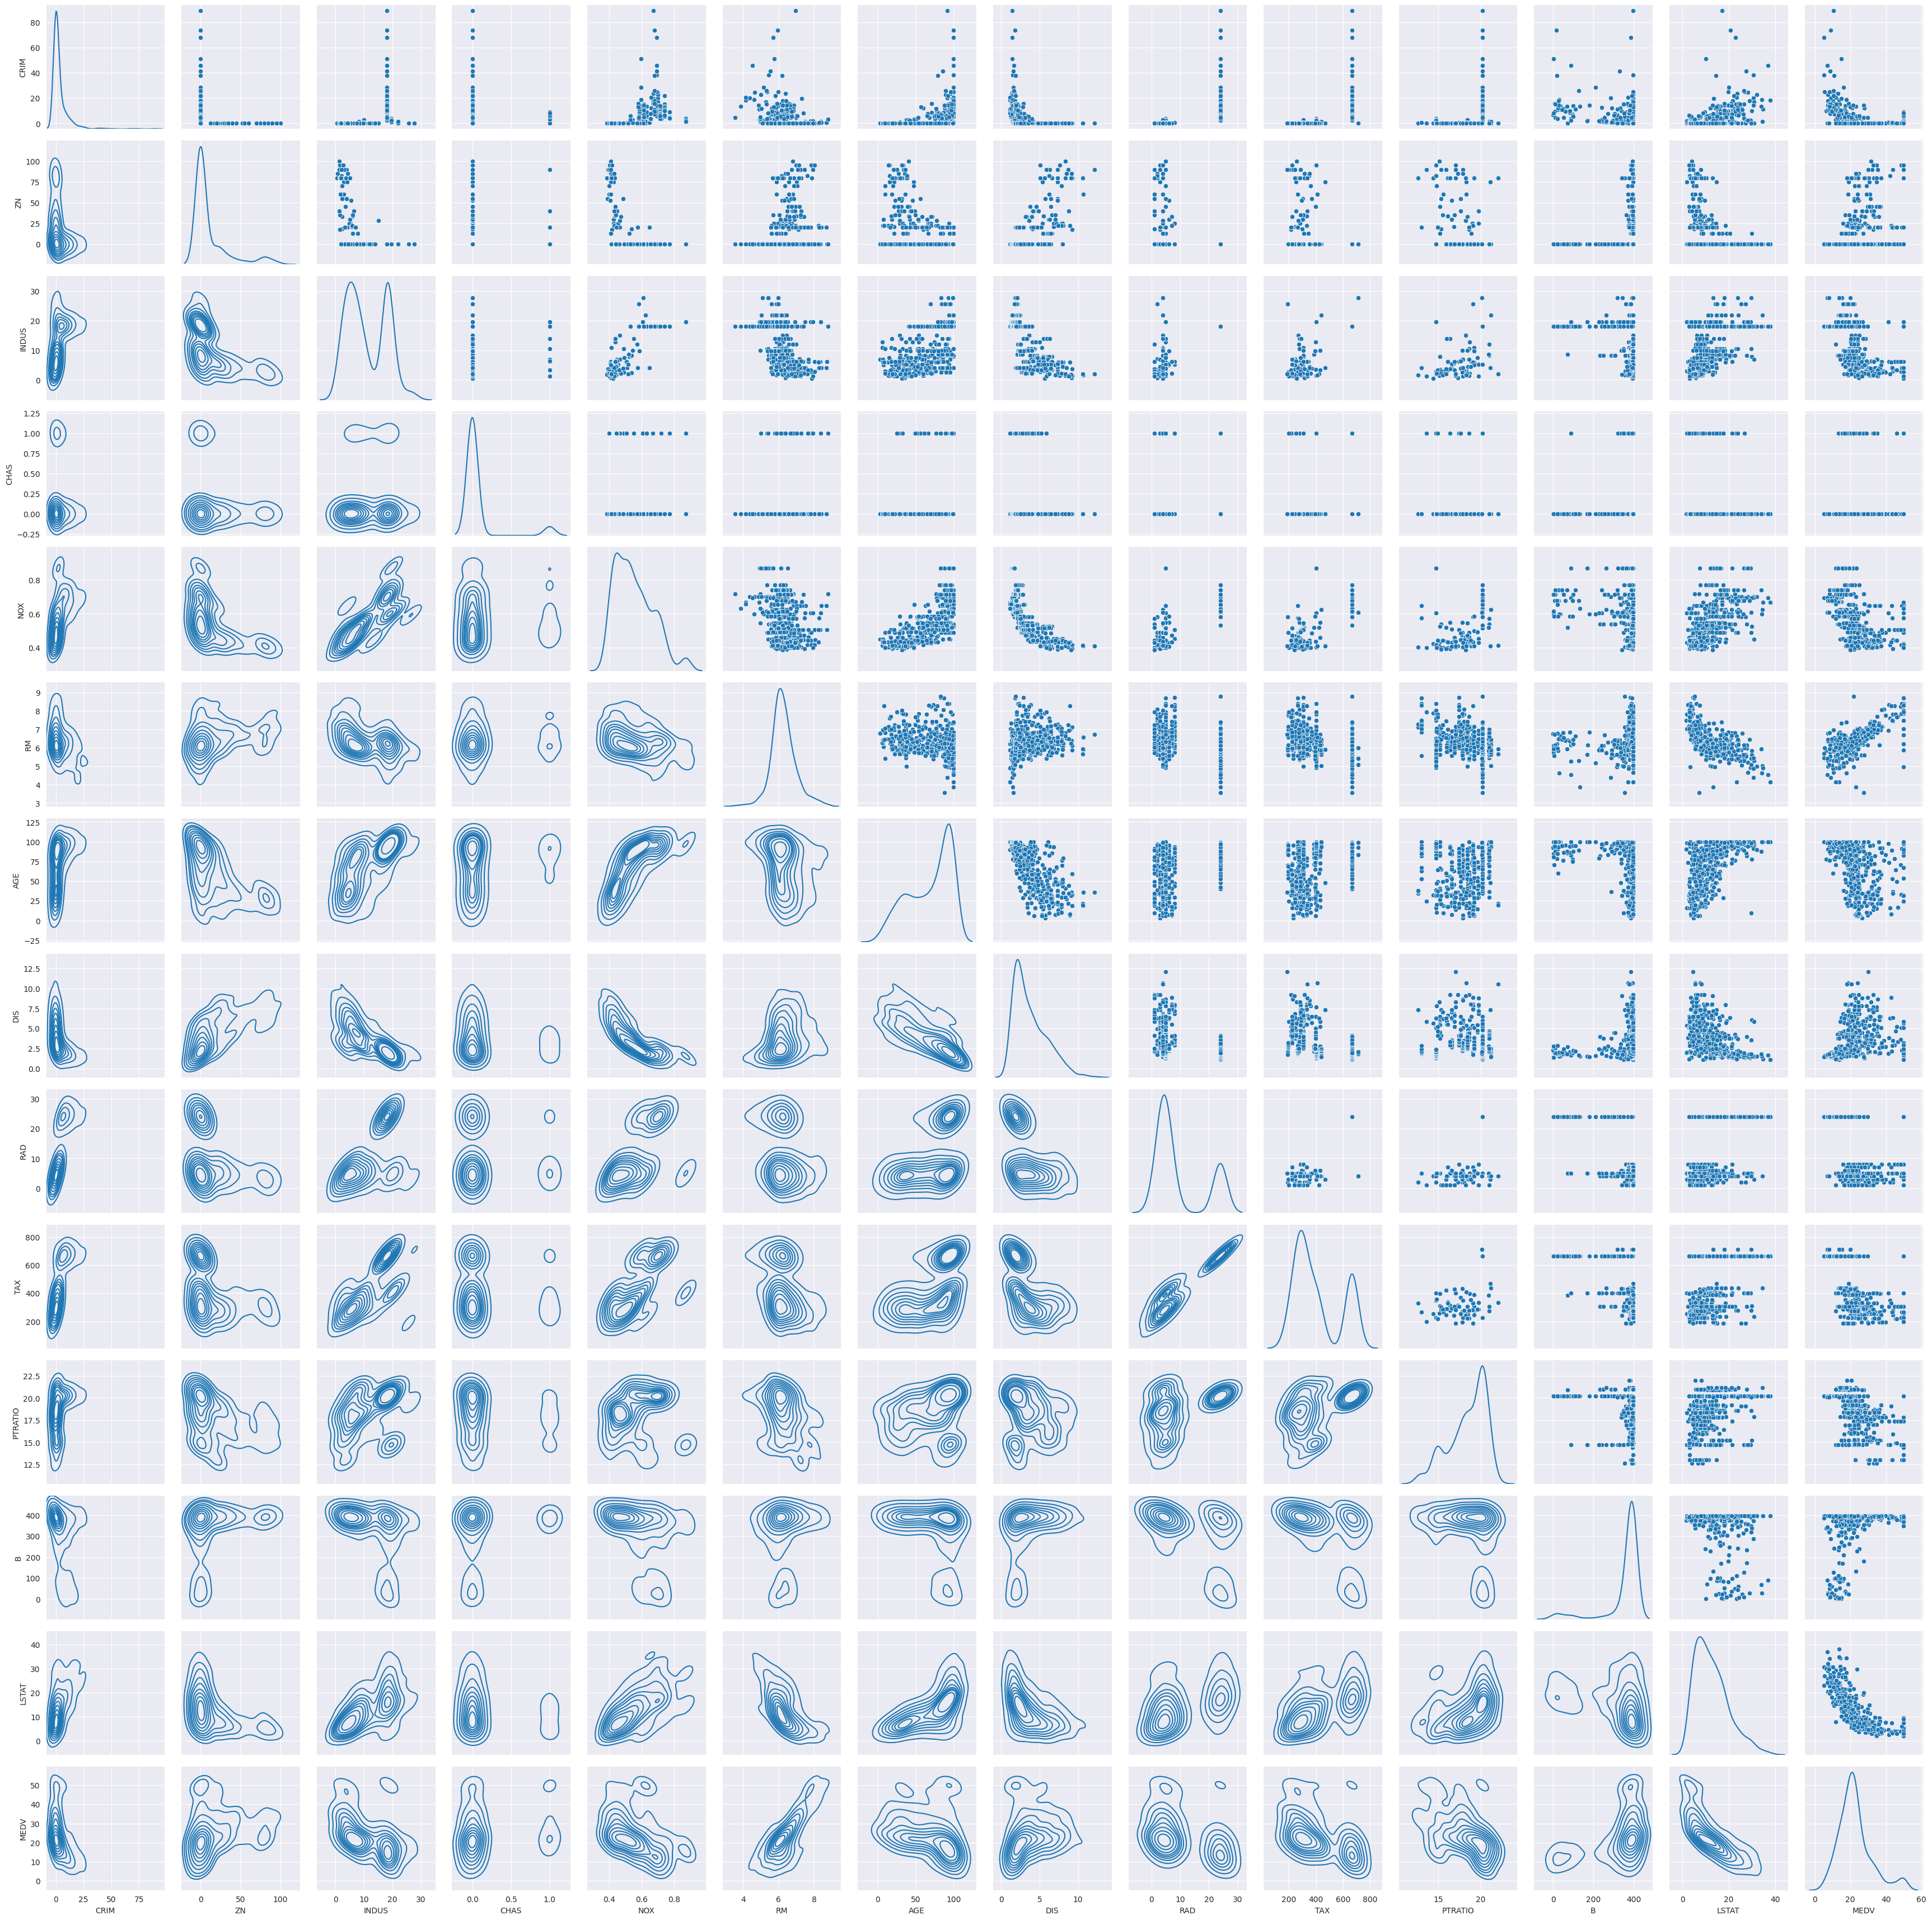

In [107]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

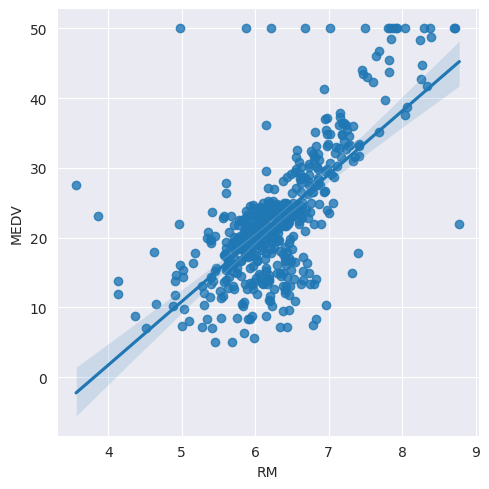

In [108]:
sns.lmplot(df, x="RM", y="MEDV")

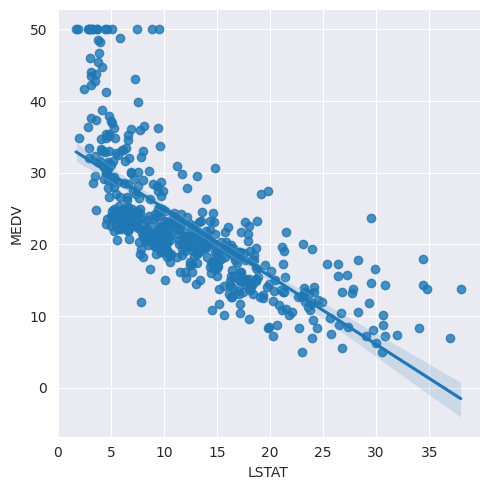

In [109]:
sns.lmplot(df, x="LSTAT", y="MEDV")


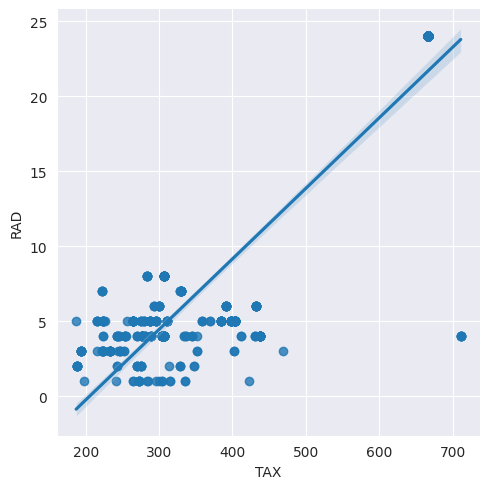

In [110]:
sns.lmplot(df, x="TAX", y="RAD")

Text(0.5, 1.0, 'Boxplot for outlier detection')

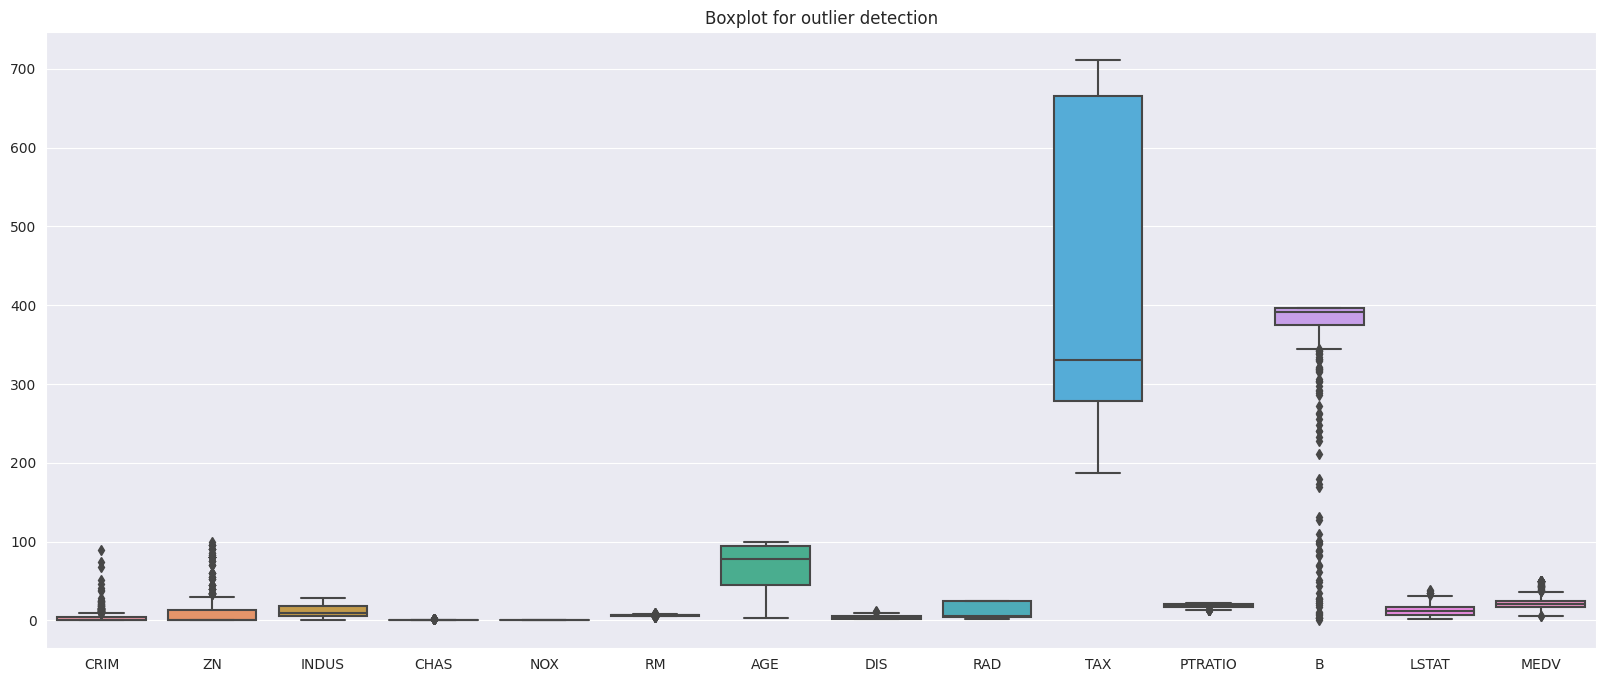

In [111]:
plt.figure(figsize=(20, 8))
sns.boxplot(df)
plt.title("Boxplot for outlier detection")

/tmp/ipykernel_91037/3735202299.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


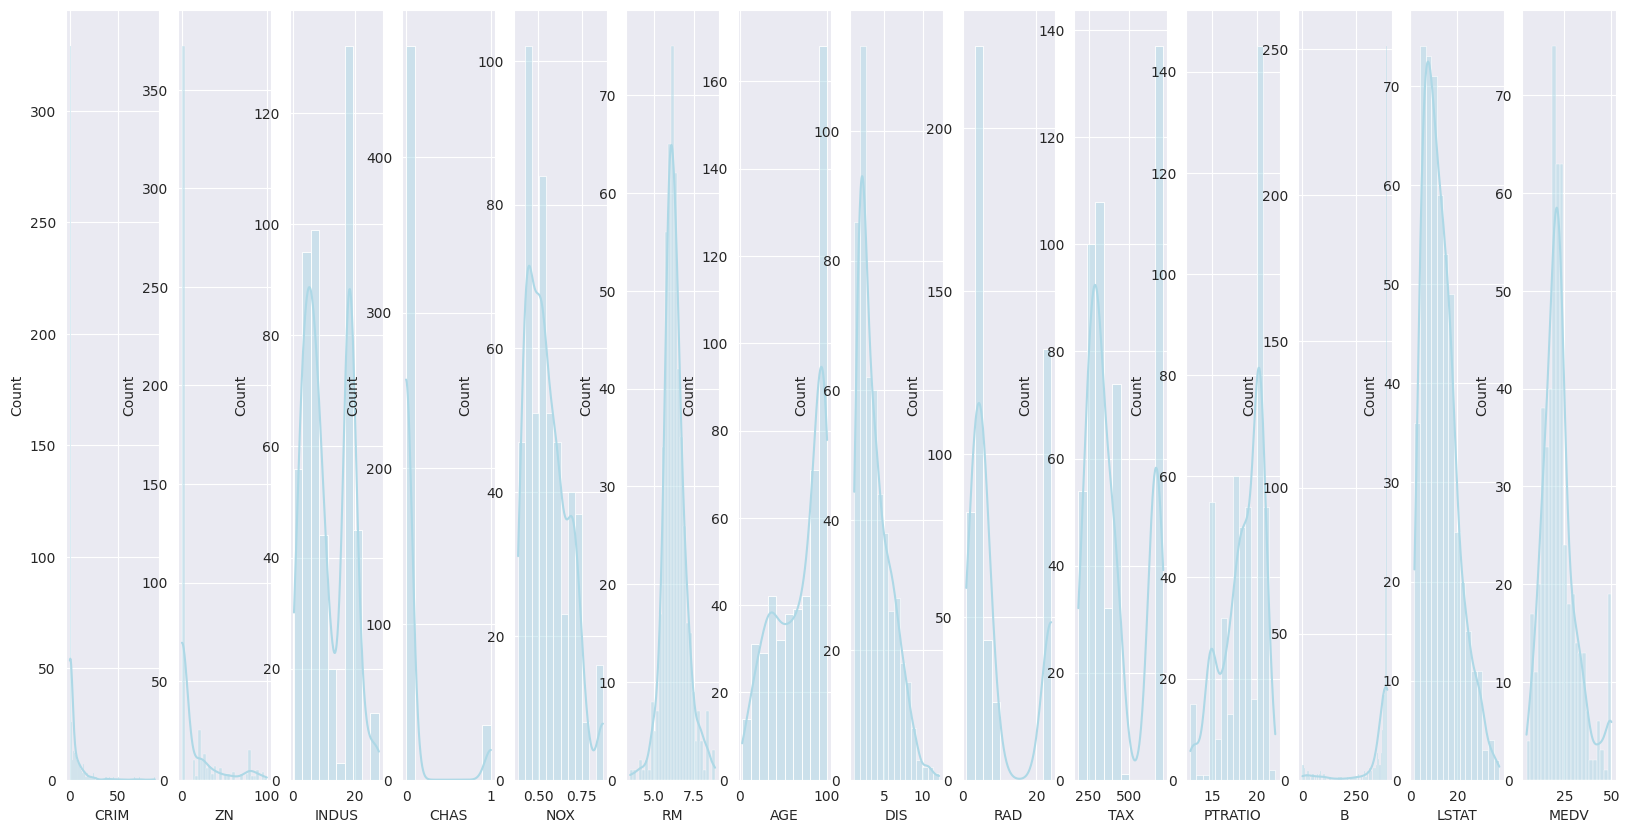

In [112]:
fig, ax =plt.subplots(1,len(df.columns),figsize=(20,10))
i = 0
for column in df.columns:
    sns.histplot(df[column], kde=True, ax=ax[i], color="lightblue")
    i += 1
fig.show()

### Which features would you choose to train the regression models, any why?


We think the features that would make the most sense would be `LSTAT` and `RM` since they have the highest correlation with our target `MEDV` (>= 0.7).
From the correlation matrix we can see that we can omit either `TAX` or `RAD` since they have a really high correlation.

## Build up your ML toolchain for this regression problem similar to the one you did for the classification and again take care of the following points:
* Data and Feature Preprocessing (if necessary and applicable)
* Train/Test split


In [134]:
y = df["MEDV"]
df.drop(columns=["MEDV"], inplace=True)
X = df
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [135]:
# Outlier Removal
q_max = X.quantile(.99)
q_min = X.quantile(.01)

X.clip(lower=q_min, upper=q_max, axis=1, inplace=True)
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.375175   11.304348   11.118875    0.069170    0.554770    6.287106   
std      6.908970   23.112644    6.809112    0.253994    0.115773    0.678876   
min      0.013610    0.000000    1.253500    0.000000    0.398000    4.524450   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     41.370330   90.000000   25.650000    1.000000    0.871000    8.335000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.584506    3.778529    9.549407  407.794466   18.454743  356.715751   
std     28.127163    2.052652    8.707259  167.791388    2.154109   91.133441   
min      6.610000    1.206540    1.000000  188.000000   13.000000    6.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000    9.222770   24.000000  666.000000   21.200000  396.900000   

            LSTAT  
count  506.000000  
mean    12.642073  
std      7.074084  
min      2.883000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     33.918500

In [136]:
from sklearn import preprocessing

# Scaling
scaler = preprocessing.StandardScaler().fit(X, y)

X_scaled = scaler.transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.487032  0.289983 -1.294970 -0.272599 -0.144997  0.424494 -0.120448   
1   -0.485047 -0.489582 -0.595215 -0.272599 -0.741581  0.197424  0.367108   
2   -0.485050 -0.489582 -0.595215 -0.272599 -0.741581  1.323927 -0.266359   
3   -0.484314 -0.489582 -1.314081 -0.272599 -0.836689  1.048199 -0.810855   
4   -0.479000 -0.489582 -1.314081 -0.272599 -0.836689  1.267896 -0.511916   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.479930 -0.489582  0.119241 -0.272599  0.157618  0.451034  0.018345   
502 -0.482445 -0.489582  0.119241 -0.272599  0.157618 -0.246395  0.288814   
503 -0.480201 -0.489582  0.119241 -0.272599  0.157618  1.015760  0.797723   
504 -0.473126 -0.489582  0.119241 -0.272599  0.157618  0.747405  0.737223   
505 -0.482135 -0.489582  0.119241 -0.272599  0.157618 -0.379098  0.434725   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.151891 -0.982843 -0.666930 -1.465973  0.441375 -1.084191  
1    0.579615 -0.867883 -0.989077 -0.304252  0.441375 -0.495547  
2    0.579615 -0.867883 -0.989077 -0.304252  0.396671 -1.218617  
3    1.113648 -0.752922 -1.108390  0.113968  0.416442 -1.372853  
4    1.113648 -0.752922 -1.108390  0.113968  0.441375 -1.034665  
..        ...       ...       ...       ...       ...       ...  
501 -0.633919 -0.982843 -0.804141  1.182752  0.387445 -0.420551  
502 -0.727110 -0.982843 -0.804141  1.182752  0.441375 -0.504037  
503 -0.785629 -0.982843 -0.804141  1.182752  0.441375 -0.990800  
504 -0.677662 -0.982843 -0.804141  1.182752  0.403481 -0.871939  
505 -0.621045 -0.982843 -0.804141  1.182752  0.441375 -0.673838  

[506 rows x 13 columns]

Density plot without scaling

<AxesSubplot: ylabel='Density'>

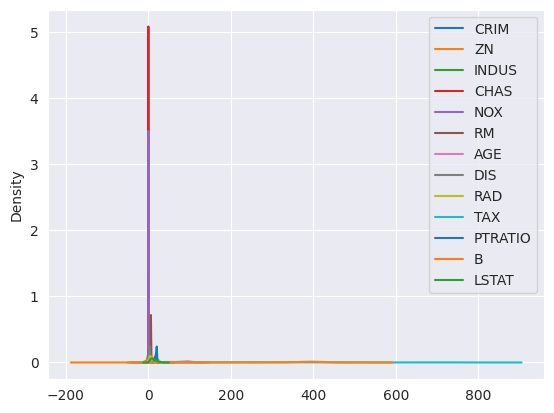

In [137]:
X.plot.density()

Density plot after scaling

<AxesSubplot: ylabel='Density'>

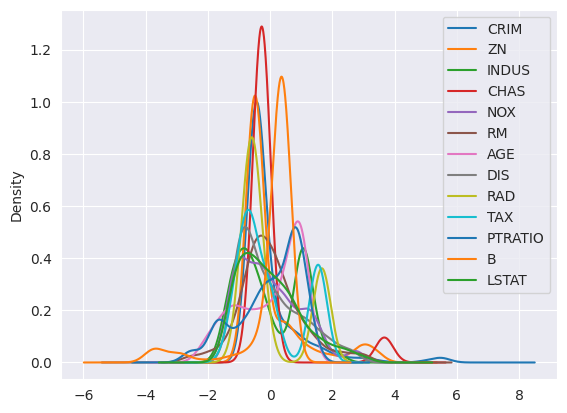

In [138]:
X_scaled.plot.density()

Add arbitrary features: the square of each feature and 2 / feature

In [139]:
for column in df.columns:
    X_scaled[column + "_q"] = X_scaled[column] ** 2
    X_scaled["2_div_" + column] = 2 / X_scaled[column]
X_scaled.describe()

CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  2.457411e-17  1.123388e-16 -3.510587e-17 -5.336092e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.870322e-01 -4.895820e-01 -1.450283e+00 -2.725986e-01 -1.355457e+00   
25%   -4.771172e-01 -4.895820e-01 -8.715884e-01 -2.725986e-01 -9.145039e-01   
50%   -4.518402e-01 -4.895820e-01 -2.100552e-01 -2.725986e-01 -1.449972e-01   
75%    4.374122e-02  5.178271e-02  1.026277e+00 -2.725986e-01  5.985711e-01   
max    5.504837e+00  3.408244e+00  2.136182e+00  3.668398e+00  2.734168e+00   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -3.861645e-16 -9.127525e-17 -2.808469e-17 -1.123388e-16  5.616939e-17   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -2.599001e+00 -2.205549e+00 -1.254248e+00 -9.828429e-01 -1.311223e+00   
25%   -5.921602e-01 -8.384358e-01 -8.184608e-01 -6.379618e-01 -7.683465e-01   
50%   -1.159032e-01  3.172846e-01 -2.784906e-01 -5.230014e-01 -4.640968e-01   
75%    4.960060e-01  9.071558e-01  6.875454e-01  1.661245e+00  1.540371e+00   
max    3.019578e+00  1.118015e+00  2.654921e+00  1.661245e+00  1.540371e+00   

       ...       RAD_q   2_div_RAD       TAX_q   2_div_TAX   PTRATIO_q  \
count  ...  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   ...    1.000000   -2.639474    1.000000   -5.889750    1.000000   
std    ...    1.063821    2.934745    0.921338   19.139905    1.290006   
min    ...    0.031727  -11.228361    0.000366  -69.924571    0.000442   
25%    ...    0.273531   -3.824081    0.220959   -3.326085    0.119932   
50%    ...    0.406995   -3.134984    0.608834   -2.331460    0.657722   
75%    ...    2.759736    1.203916    2.372744    1.298388    1.301176   
max    ...    2.759736    1.203916    2.372744  104.585086    6.424989   

       2_div_PTRATIO         B_q     2_div_B       LSTAT_q  2_div_LSTAT  
count     506.000000  506.000000  506.000000  5.060000e+02   506.000000  
mean       -0.332523    1.000000    5.083064  1.000000e+00   -12.008797  
std        17.986905    3.022089   32.657142  1.506273e+00   305.550689  
min       -78.621050    0.000009 -127.712826  8.605352e-08 -6817.822242  
25%        -1.827783    0.108718    4.531295  1.248494e-01    -2.946427  
50%         1.690972    0.168023    4.735768  5.197661e-01    -1.610416  
75%         2.466089    0.194812    5.558361  1.220190e+00     2.549351  
max        95.100571   14.777614  663.946560  9.063921e+00   506.113901  

[8 rows x 39 columns]

Create train and test split with sklearn

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)  # 70/30 split

Use PCA to reduce features

In [141]:
from sklearn.decomposition import PCA
# we have 39 features and consider only 15
pca = PCA(n_components=15)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-1.37887965e+01, -7.48366039e+00, -2.53537635e+00, ...,
        -1.80579065e+00,  2.87993686e+00,  1.13879143e+00],
       [-1.31162697e+01, -8.64723565e+00, -2.10433914e+01, ...,
        -5.97412840e-01, -1.90635869e+00, -1.32081746e-01],
       [-2.15031645e+01, -1.00102608e+01, -4.80286632e+00, ...,
        -1.40563631e-01, -2.22136981e+00, -4.12531890e-01],
       ...,
       [-1.62231407e+01, -4.58594229e+00, -1.23347884e+01, ...,
        -1.34004792e+00, -3.22636204e-01, -1.16949362e+00],
       [-3.88621123e+01, -1.88949844e+00, -4.73645378e+00, ...,
         2.81594338e-01, -3.10710587e+00,  2.86526068e+00],
       [-1.27674349e+01,  1.96876001e+00,  5.09432389e+01, ...,
        -1.49351261e+00, -2.89896648e-02, -1.37865142e+00]])

* Use the following Regression models with different hyperparemter
settings (where applicable) and an appropriate cross-validation setup
for your training:
    * Linear Regression
    * Polynomial Regression
    * Logistic Regression
* Estimate the models’ performances on the test set again with two
different error/performance measurements
* Explain which model you would use in deployment and why

In [179]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor

linear_reg = LinearRegression()
best_score = 0
train_x = pd.DataFrame(X_train)
train_y = pd.DataFrame(y_train)
for train_idx, test_idx in KFold(n_splits=10).split(X_train):
    kx_train, kx_test = train_x.iloc[train_idx], train_x.iloc[test_idx]
    ky_train, ky_test = train_y.iloc[train_idx], train_y.iloc[test_idx]
    m = LinearRegression()
    m.fit(kx_train, ky_train)
    current_score = m.score(kx_test, ky_test)
    print(current_score)
    if current_score > best_score:
        best_score = current_score
        linear_reg = m
print("best score: ", best_score)

0.22104931892870727
0.36874796503327023
0.32875238912767324
-2.0638837187005707
0.18496660306796886
0.32387132362440063
0.3987482263196582
0.3530107909115965
0.2380194930484011
-0.08318850337438444
best score:  0.3987482263196582


In [180]:
linear_reg.score(X_test, y_test)

0.362223090153474

In [188]:
# TODO doesnt work yet, wait for response

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg = LinearRegression()
best_score = 0
train_x = pd.DataFrame(poly_features)
train_x.describe()
train_y = pd.DataFrame(y_train)
for train_idx, test_idx in KFold(n_splits=10).split(X_train):
    kx_train, kx_test = train_x.iloc[train_idx], train_x.iloc[test_idx]
    ky_train, ky_test = train_y.iloc[train_idx], train_y.iloc[test_idx]
    m = LinearRegression()
    m.fit(kx_train, ky_train)
    current_score = m.score(kx_test, ky_test)
    print(current_score)
    if current_score > best_score:
        best_score = current_score
        poly_reg = m
print("best score: ", best_score)

0.013073825291815888
-0.006612343433054724
0.007982982665450944
-0.37982251869787387
-0.08870920724162601
-0.007848162290608363
0.016361215741031554
-0.018204534442392895
0.002331380920751691
-0.06618509566574948
best score:  0.016361215741031554


In [187]:
poly_reg.score(X_test, y_test)

ValueError: X has 15 features, but LinearRegression is expecting 2 features as input.